# Netflix Analysis
## by Hagop Bozawglanian

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_netflix = pd.read_csv('NetflixViewingHistory.csv')

In [3]:
df_netflix['Date'] = pd.to_datetime(df_netflix['Date'])
df_netflix['Year'], df_netflix['Month'] = df_netflix['Date'].dt.year, df_netflix['Date'].dt.month_name()
df_netflix['Day'] = df_netflix['Date'].dt.day
df_netflix['Day_of_week'] = df_netflix['Date'].dt.day_name()

show_details = df_netflix.Title.str.split(":", expand = True, n = 2)
df_netflix['show_name'] = show_details[0]
df_netflix['season'] = show_details[1]
df_netflix['episode_name'] = show_details[2]

df_netflix['show_type'] = df_netflix.apply(lambda x:'Movie' if pd.isnull(x['season']) else 'TV Show', axis=1)

## Viewing Distribution in a Month

> I was able to show a distribution over an average month by taking the average of shows watched by day within a month.

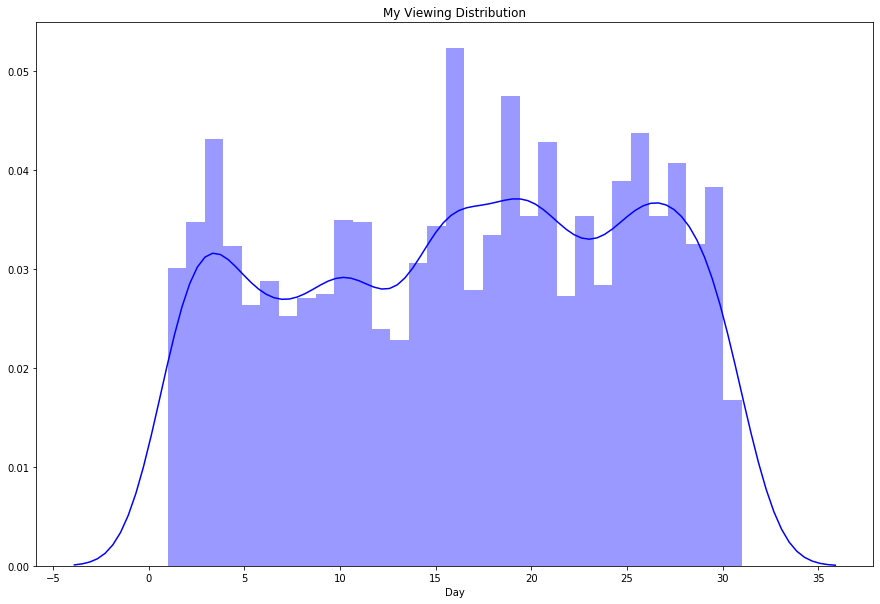

In [4]:
plt.figure(figsize=(15,10))
plt.title("My Viewing Distribution")
ax = sns.distplot(df_netflix['Day'],bins=31,color="blue",hist=True)

## Viewing Distribution per day

> I was able to count up the shows per day to see what days I tend to watch shows on.

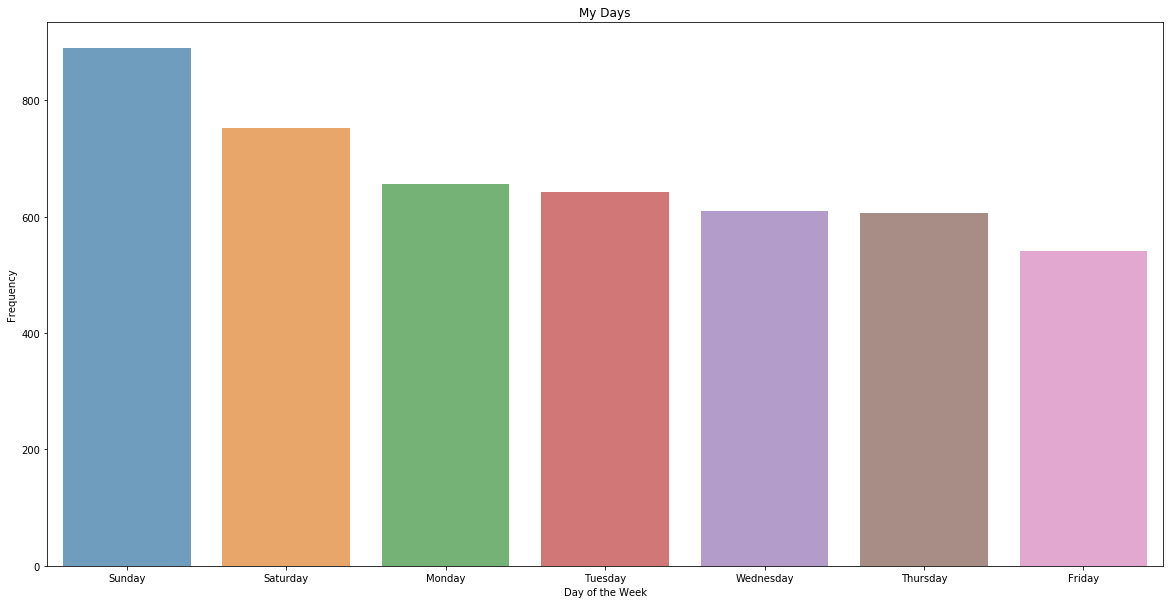

In [5]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df_netflix["Day_of_week"].value_counts().index, y=df_netflix["Day_of_week"].value_counts(),alpha=0.7)
plt.title("My Days")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.show();

## Most Watched Month by Year

> I wanted to be able to see what month/year I ingested the most media and see if there is a trend between what month I watch the most media year over year.

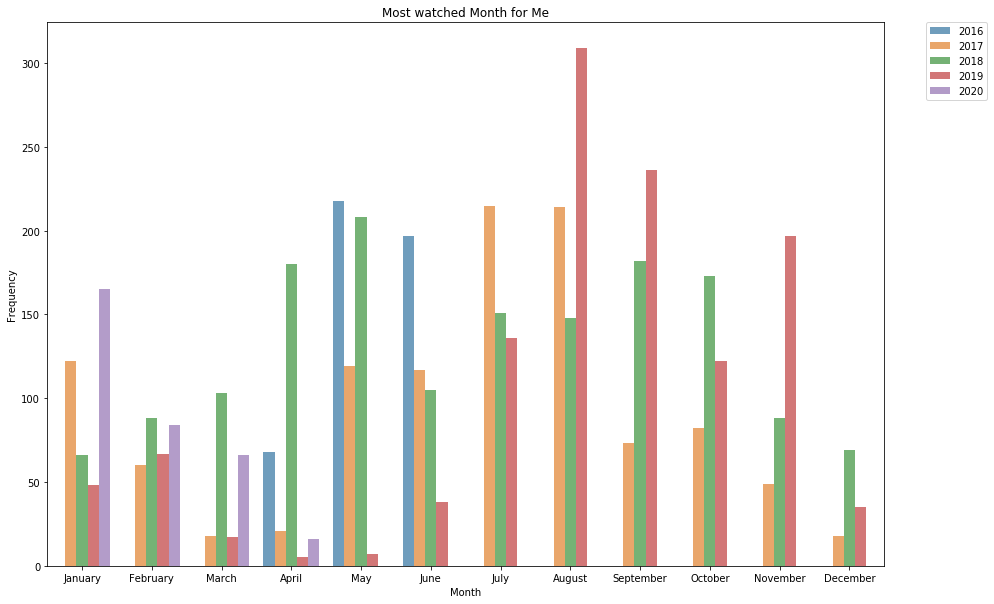

In [6]:
by_year = df_netflix.groupby('Month')['Year'].value_counts().sort_values(ascending=False).reset_index(name='Frequency')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,10))
ax = sns.barplot(x=by_year["Month"], y=by_year["Frequency"],order=month_order, hue=by_year["Year"],alpha=0.7)
plt.title("Most watched Month for Me")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

## Most Watched Year by Month

> I wanted to see over a year what my media intake was like for netflix.

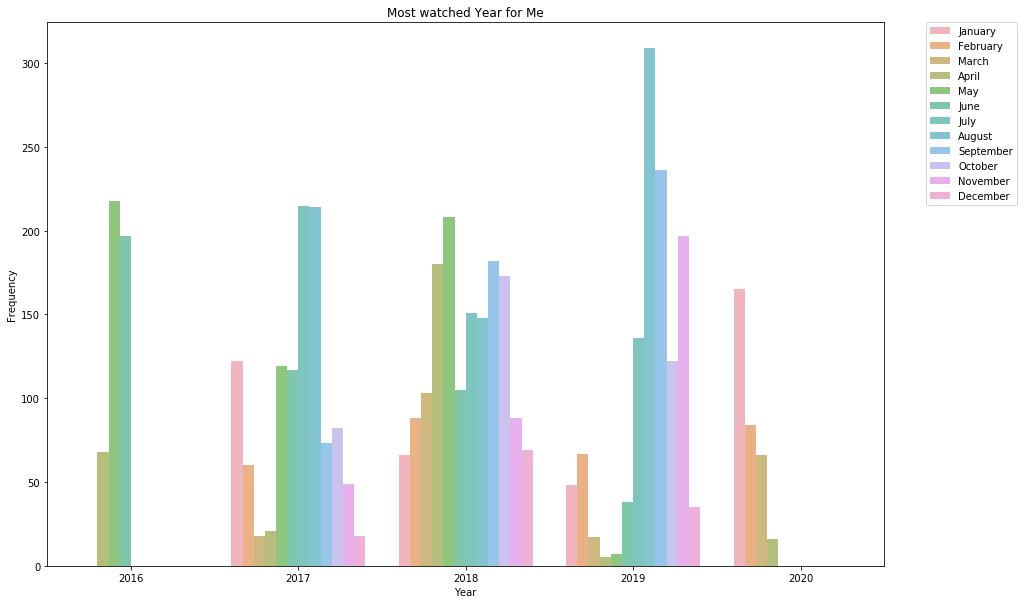

In [7]:
by_month = df_netflix.groupby('Month')['Year'].value_counts().sort_values(ascending=False).reset_index(name='Frequency')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,10))
ax = sns.barplot(x=by_month["Year"], y=by_month["Frequency"], hue=by_month["Month"], hue_order=month_order,alpha=0.7)
plt.title("Most watched Year for Me")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

## Movies vs Television

> I wanted to see how my TV show ingestion is compared to movies.

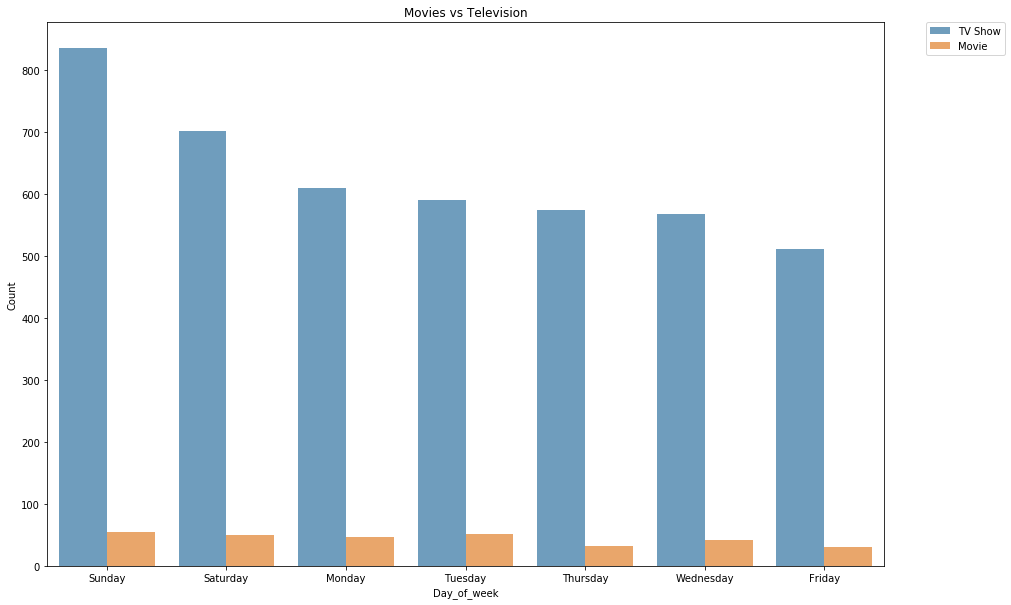

In [8]:
show_freq = df_netflix.groupby('show_type')['Day_of_week'].value_counts().sort_values(ascending=False).reset_index(name='Count')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=show_freq["Day_of_week"], y=show_freq["Count"], hue=show_freq["show_type"],alpha=0.7)
plt.title("Movies vs Television")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

## Longest Watched Shows 

> I wanted to see which show I've spent the most time watching.

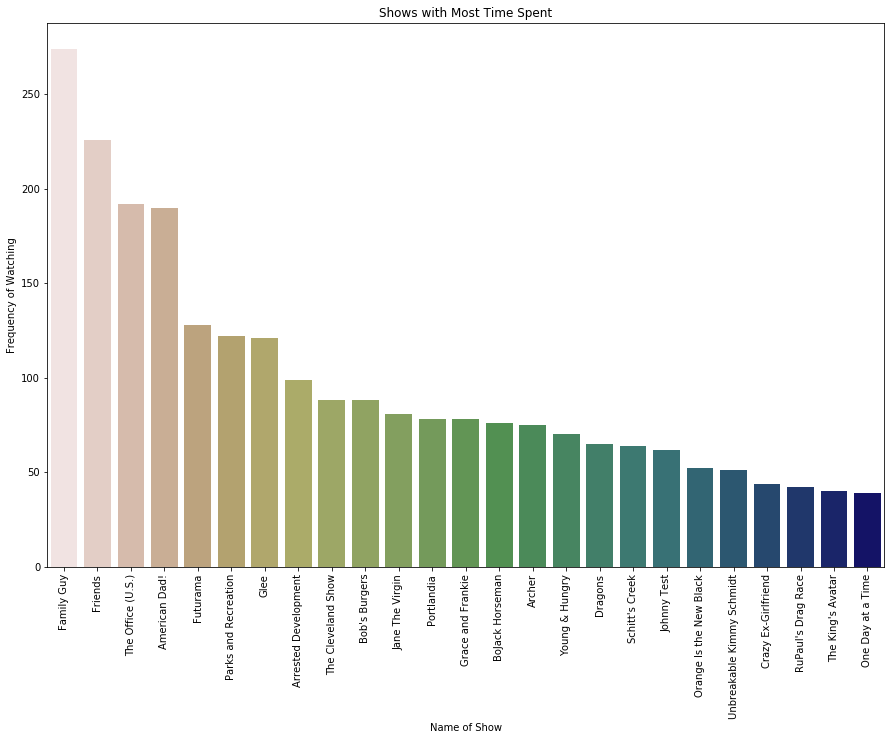

In [9]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=df_netflix['show_name'].sort_values(ascending=True).value_counts().index[:25], 
                 y=df_netflix["show_name"].sort_values(ascending=True).value_counts()[:25],
                 palette="gist_earth_r")
plt.title("Shows with Most Time Spent")
plt.xlabel("Name of Show")
plt.ylabel("Frequency of Watching")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert Netflix_slides.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Netflix_slides.ipynb to slides
[NbConvertApp] Writing 0 bytes to Netflix_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Netflix_slides.slides.html
Use Control-C to stop this server
[NbConvertApp] WARNING | No web browser found: could not locate runnable browser.
